A recommender system is a simple algorithm whose aim is to provide the user with most relevant information by discovering the patterns in the dataset.

# Types Of Recommendation Systems

The most common type of recommendation systems are content based and collaborative filtering recommender systems.

In [1]:
#Imports
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Load the dataset
df = pd.read_csv('u.data', sep='\t', names=['user_id','movie_id','rating','titmestamp'])

In [17]:
df.head()

,user_id,movie_id,rating,titmestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
#Load the movies info dataset
movies = pd.read_csv('u.item',sep = '|', names = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'], usecols = range(5),encoding = 'latin-1')

In [13]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [18]:
#Merging movie titles dataset with user ratings(data) set for better view of which movie got which rating.
df = pd.merge(df, movies, on='movie_id')

In [19]:
df.head()

,user_id,movie_id,rating,titmestamp,title,release_date,video_release_date,imdb_url
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996)
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996)
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996)
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996)
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996)


In [34]:
#Getting brief information about the data number of rows etc.
df.describe()

,user_id,movie_id,rating,titmestamp,video_release_date
count,100000.00000,100000.000000,100000.000000,1.000000e+05,0.0
mean,462.48475,425.530130,3.529860,8.835289e+08,NaN
std,266.61442,330.798356,1.125674,5.343856e+06,NaN
min,1.00000,1.000000,1.000000,8.747247e+08,NaN
25%,254.00000,175.000000,3.000000,8.794487e+08,NaN
50%,447.00000,322.000000,4.000000,8.828269e+08,NaN
75%,682.00000,631.000000,4.000000,8.882600e+08,NaN
max,943.00000,1682.000000,5.000000,8.932866e+08,NaN


In [21]:
#Now we create a new dataframe by grouping the dataset by 'title' column and compute its mean to obtain the average rating of each movie.
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [22]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
#Now we create a number of ratings column for each movie, to see how many times each movie was rated.
#Because it could be possible that a movie with average rating of 5 was rated by one user only.
#To do this we will use group by function on title column and use count to count the number of ratings.

In [24]:
ratings['Number of ratings'] = df.groupby('title')['rating'].count()

In [25]:
ratings.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


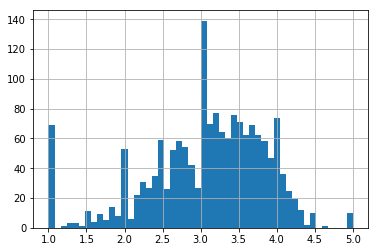

In [26]:
#Plotting a histogram to visualize the distribution of ratings.
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

In [27]:
#Observation :- we can see that most of the movies are rated between 2.5 - 4

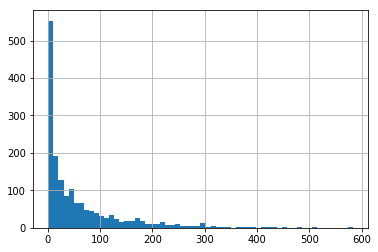

In [28]:
#Plotting a histogram to visualize the distribution of number of ratings.
ratings['Number of ratings'].hist(bins=60)

In [29]:
#Observation :- we can see that most of the movies have few ratings movies with most number of ratings are the popular ones.

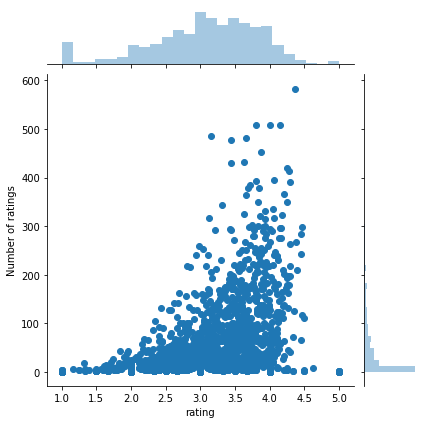

In [30]:
#Now we see the relationship between the avg rating of the movie and number of ratings.
#Use scatter plot.

import seaborn as sns
sns.jointplot(x = 'rating', y = 'Number of ratings', data = ratings)

In [31]:
#Observation :- As we can see that there is a positive relationship between the number of ratings and rating, it can be seen 
#that higher the number of ratings get the more is the average rating. 

# Item Based Recommender

In [38]:
#Convert the dataset into a matrix with the movie titles as columns and users as indexes and ratings as values.
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [39]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [40]:
#Looking at the most rated movies
ratings.sort_values('Number of ratings', ascending = False).head()

,rating,Number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [56]:
fargo_user_rating = movie_matrix['Fargo (1996)']
contact_user_rating = movie_matrix['Contact (1997)']

In [57]:
fargo_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

In [58]:
contact_user_rating.head()

user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [59]:
#In order to compute the correlation between two dataframes we use pandas corwith functionality.
#Corrwith computes the pairwise correlation of rows or columns of two dataframe objects.

In [60]:
similar_to_fargo = movie_matrix.corrwith(fargo_user_rating)

In [61]:
similar_to_fargo.head()

title
'Til There Was You (1997)    0.100000
1-900 (1994)                 0.866025
101 Dalmatians (1996)       -0.245368
12 Angry Men (1957)          0.098676
187 (1997)                   0.142509
dtype: float64

In [62]:
#Observation - As you can see that correlation between Fargo and 1-900(1994) is 0.866.
#This indicates very strong similarity between these two movies.

In [63]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [65]:
similar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [66]:
#Observation - As you can see that correlation between Contact and Til there was you(1997) is 0.9045.
#This shows very strong similarity between these two movies.

In [67]:
#As notices our matrix had many missing values because not all the movies were rated by all the users.
#Therefore we drop those null values and transform into a new correlation dataframe.

In [68]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [69]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,correlation
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [70]:
#Join both of these dataframes to the number of ratings column from ratings data frame
#Because we want to set a threshold for number of ratings also, as many movies are rated 5 stars by one user only

In [71]:
corr_contact = corr_contact.join(ratings['Number of ratings'])
corr_fargo = corr_fargo.join(ratings['Number of ratings'])

In [72]:
corr_contact.head()

,Correlation,Number of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [73]:
corr_fargo.head()

,correlation,Number of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [74]:
#Now view the movies that are most similar to Contact and atleast rated by 100 users.

In [76]:
corr_contact[corr_contact['Number of ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,Number of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104
